<a href="https://colab.research.google.com/github/SunYutongAmber/portfolio/blob/main/Final%20Project/code/Final_Analyze_Cryptopunks_Data_Machine_Learning_for_Predicting_Market_Congestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [5]:
C_train = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Classification_Train.csv")
C_test = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Classification_Test.csv")

In [6]:
C_train.isna().sum()

Unnamed: 0            0
high_return           0
ROI_past_average10    1
dtype: int64

## Drop nan for classification Data

In [7]:
C_train =C_train.dropna()

In [8]:
C_train.head()

,Unnamed: 0,high_return,ROI_past_average10
1,2,0,0.256252
2,3,0,-0.015182
3,4,1,-0.017117
4,5,1,0.146998
5,6,0,0.176230


In [9]:
C_test.isna().sum()

Unnamed: 0            0
high_return           0
ROI_past_average10    0
dtype: int64

## import train and test data for Regression

In [10]:
R_train = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Regression_Train_Cryptopunks.csv")
R_test = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Regression_Test_Cryptopunks.csv")

## drop nan for Regression Data

In [11]:
R_train.isna().sum()

Unnamed: 0            0
ROI                   0
ROI_past_average10    1
dtype: int64

In [12]:
R_train=R_train.dropna()

In [13]:
R_test.isna().sum()

Unnamed: 0            0
ROI                   0
ROI_past_average10    0
dtype: int64

In [14]:
R_train.head()

,Unnamed: 0,ROI,ROI_past_average10
1,2,-0.286615,0.256252
2,3,-0.020988,-0.015182
3,4,0.639344,-0.017117
4,5,0.293158,0.146998
5,6,-0.343799,0.176230


In [15]:
R_test.head()

,Unnamed: 0,ROI,ROI_past_average10
0,918,-0.319668,0.227745
1,919,-0.451086,0.193472
2,920,0.331667,0.192793
3,921,4.125766,0.210238
4,922,-0.635588,0.611775


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [ ]:
C_train.head()

,Unnamed: 0,high_return,ROI_past_average10
1,2,0,0.256252
2,3,0,-0.015182
3,4,1,-0.017117
4,5,1,0.146998
5,6,0,0.176230


In [ ]:
X_train = pd.DataFrame(np.array(C_train['ROI_past_average10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['high_return'].astype(int))

In [ ]:
C_test.head()

,Unnamed: 0,high_return,ROI_past_average10
0,918,0,0.227745
1,919,0,0.193472
2,920,1,0.192793
3,921,1,0.210238
4,922,0,0.611775


In [ ]:
X_test = pd.DataFrame(np.array(C_test['ROI_past_average10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['high_return'].astype(int))

## Import base packages

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [ ]:
y_pred= mdl.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

## Evaluations

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       223
           1       0.51      0.60      0.55       235

    accuracy                           0.50       458
   macro avg       0.49      0.49      0.49       458
weighted avg       0.49      0.50      0.49       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


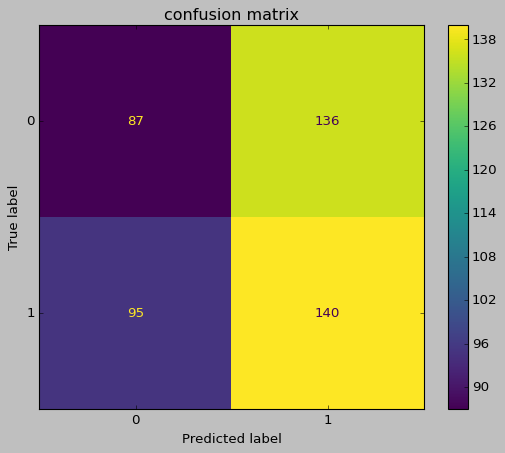

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


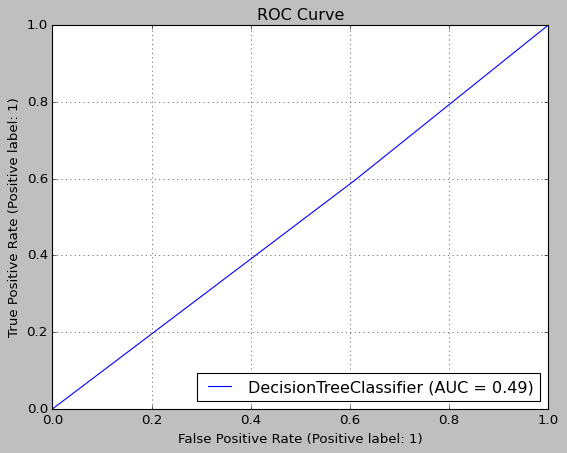

In [ ]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Neural network models (supervised)

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
mdl = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)
y_pred= mdl.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.58      0.19      0.29       223
           1       0.53      0.87      0.66       235

    accuracy                           0.54       458
   macro avg       0.56      0.53      0.47       458
weighted avg       0.56      0.54      0.48       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


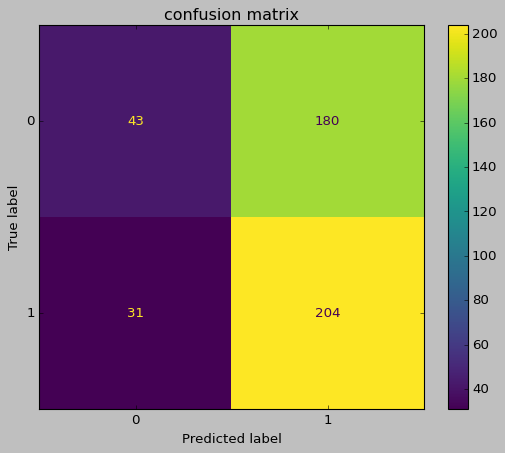

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-30-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [ ]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       223
           1       0.51      0.60      0.55       235

    accuracy                           0.50       458
   macro avg       0.49      0.49      0.49       458
weighted avg       0.49      0.50      0.49       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


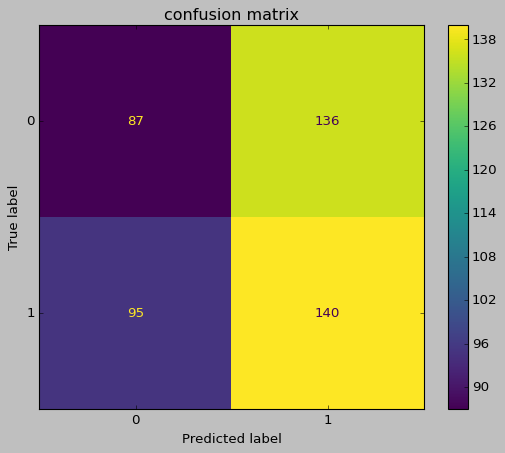

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


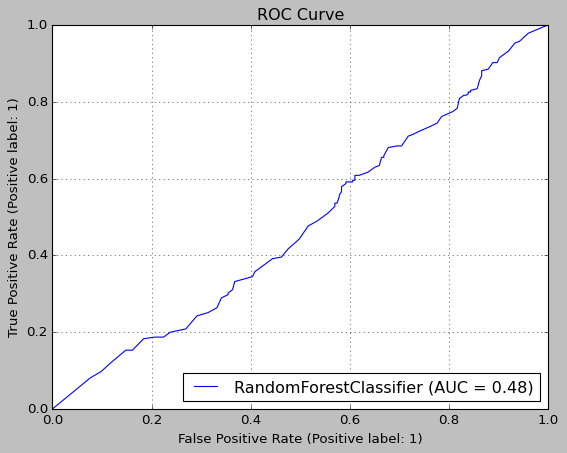

In [ ]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.07      0.13       223
           1       0.52      0.96      0.67       235

    accuracy                           0.53       458
   macro avg       0.57      0.51      0.40       458
weighted avg       0.57      0.53      0.41       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


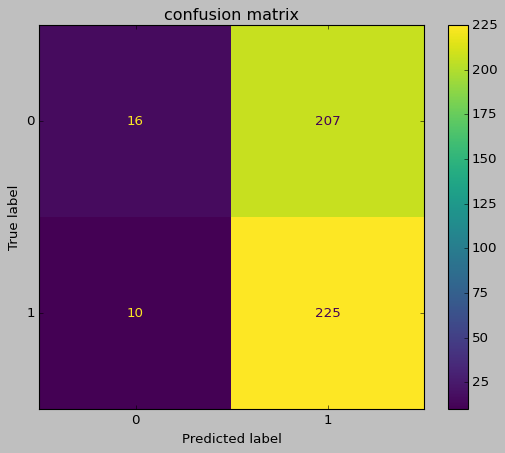

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [ ]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 4.7 MB/s 
     |████████████████████████████████| 224 kB 65.0 MB/s 
     |████████████████████████████████| 101 kB 14.4 MB/s 
     |████████████████████████████████| 279 kB 74.7 MB/s 
     |████████████████████████████████| 62 kB 831 kB/s 
     |████████████████████████████████| 59 kB 8.0 MB/s 
     |████████████████████████████████| 49 kB 7.8 MB/s 
     |████████████████████████████████| 132 kB 62.8 MB/s 
     |████████████████████████████████| 1.0 MB 69.7 MB/s 
     |████████████████████████████████| 41 kB 527 kB/s 
     |████████████████████████████████| 802 kB 49.3 MB/s 
     |████████████████████████████████| 1.6 MB 58.7 MB/s 
     |████████████████████████████████| 60.2 MB 1.2 MB/s 
     |████████████████████████████████| 280 kB 80.2 MB/s 
     |████████████████████████████████| 248 kB 69.4 MB/s 
  Installing build dependencies ... done

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [ ]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [ ]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    916
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12637.31 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [ ]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.580786,0.580786,0.567398,0.770213,0.653430,0.559783,0.003123,0.003878,1.034951,0.003123,0.003878,1.034951,1,True,4
1,NeuralNetTorch,0.539301,0.539301,0.529703,0.910638,0.669797,0.565217,0.013232,0.015548,2.093033,0.013232,0.015548,2.093033,1,True,12
2,NeuralNetFastAI,0.537118,0.537118,0.529412,0.880851,0.661342,0.543478,0.032359,0.013946,4.660284,0.032359,0.013946,4.660284,1,True,10
3,LightGBMXT,0.532751,0.532751,0.525060,0.936170,0.672783,0.543478,0.002355,0.029782,3.279759,0.002355,0.029782,3.279759,1,True,3
4,CatBoost,0.532751,0.532751,0.526854,0.876596,0.658147,0.576087,0.004727,0.001894,1.702533,0.004727,0.001894,1.702533,1,True,7
5,WeightedEnsemble_L2,0.532751,0.532751,0.526854,0.876596,0.658147,0.576087,0.006732,0.003177,2.304607,0.002005,0.001283,0.602074,2,True,14
6,ExtraTreesGini,0.515284,0.515284,0.522648,0.638298,0.574713,0.483696,0.135808,0.089884,1.813081,0.135808,0.089884,1.813081,1,True,8
7,RandomForestGini,0.510917,0.510917,0.520295,0.600000,0.557312,0.500000,0.110138,0.099961,2.045407,0.110138,0.099961,2.045407,1,True,5
8,RandomForestEntr,0.510917,0.510917,0.520295,0.600000,0.557312,0.500000,0.123087,0.104920,2.273561,0.123087,0.104920,2.273561,1,True,6
9,ExtraTreesEntr,0.504367,0.504367,0.513889,0.629787,0.565966,0.483696,0.141041,0.105744,1.801148,0.141041,0.105744,1.801148,1,True,9


# Machine Learning Regression

## important global packages

In [16]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [17]:
R_train.head()

,Unnamed: 0,ROI,ROI_past_average10
1,2,-0.286615,0.256252
2,3,-0.020988,-0.015182
3,4,0.639344,-0.017117
4,5,0.293158,0.146998
5,6,-0.343799,0.176230


In [18]:
X_train = pd.DataFrame(R_train['ROI_past_average10'])
y_train = pd.DataFrame(R_train['ROI'])

In [19]:
R_test.head()

,Unnamed: 0,ROI,ROI_past_average10
0,918,-0.319668,0.227745
1,919,-0.451086,0.193472
2,920,0.331667,0.192793
3,921,4.125766,0.210238
4,922,-0.635588,0.611775


In [20]:
X_test = pd.DataFrame(R_test['ROI_past_average10'])
y_test = pd.DataFrame(R_test['ROI'])

## Linear Regression

In [21]:
from sklearn import linear_model

In [22]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [23]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -1.5287543409876378


In [24]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.581534
1,0.589067
2,0.589217
3,0.585382
4,0.497128
...,...
453,0.621519
454,0.633564
455,0.626694
456,0.618914


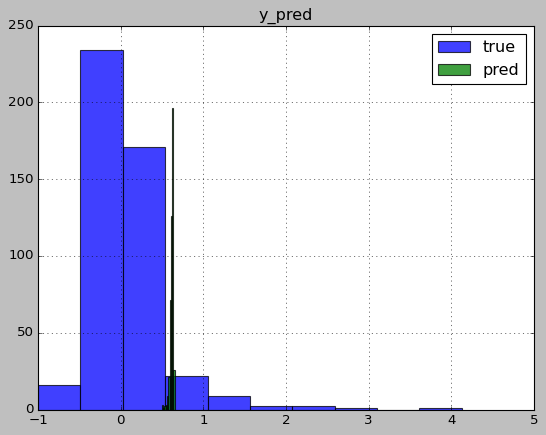

In [25]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-27-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [28]:
# calculate R2
from sklearn.metrics import r2_score

In [29]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -29.760705618827505


In [30]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-0.237824
1,-0.244846
2,-0.287926
3,-0.299657
4,-0.656974
...,...
453,0.666981
454,14.944689
455,3.174622
456,0.169610


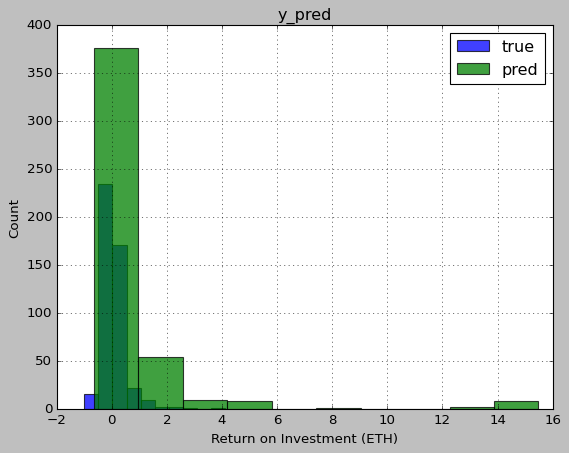

In [31]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)
plt.xlabel('Return on Investment (ETH)')
plt.ylabel('Count')


ax.legend()
fig.show()


## Auto-ML

In [32]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [33]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

NameError: ignored

In [ ]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [ ]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

In [ ]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Ridge Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

In [34]:
from sklearn.linear_model import Ridge
import numpy as np

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()

Ridge()

In [35]:
y_pred =clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [36]:
y_pred 

,0
0,-0.319523
1,-0.450918
2,0.331708
3,4.125195
4,-0.635405
...,...
453,0.000100
454,0.242856
455,0.076203
456,0.077891


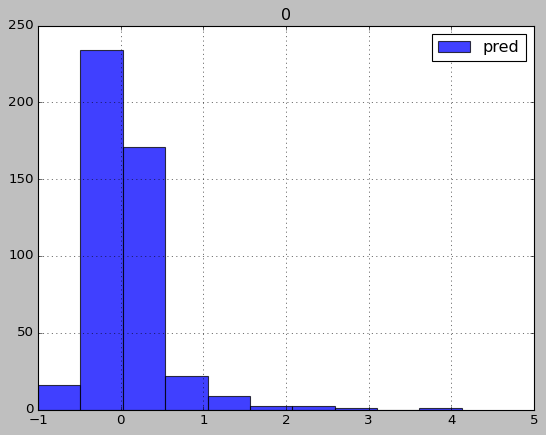

In [37]:
fig, ax = plt.subplots()

y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

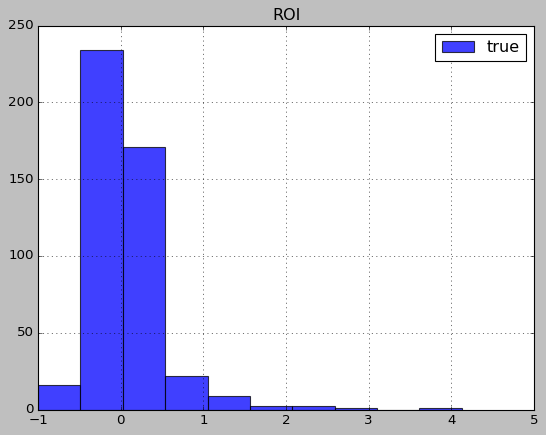

In [38]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)


ax.legend()
fig.show()

In [39]:
clf.score(X_test,y_test)

0.999999934151525

In [41]:
clf.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [44]:
print("Training set score:{}".format(clf.score(X_train,y_train)))
print("ridge.coef_: {}".format(clf.coef_))
print("ridge.intercept_: {}".format(clf.intercept_))

Training set score:0.9999999740442934
ridge.coef_: [[-3.54006403e-05  9.99838595e-01]]
ridge.intercept_: [0.0001019]
